In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
# remove warning
import warnings
warnings.filterwarnings(action='ignore')
print('Libraries have been imported')

Libraries have been imported


<div style="color:white;display:fill;border-radius:2px;background-color:#0000FF;
       font-size:150%;font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 10px;color:white;"><b><i> CHAPTER 2: Supervised Learning
</i></b></p>
</div>

X.shape: (26, 2)


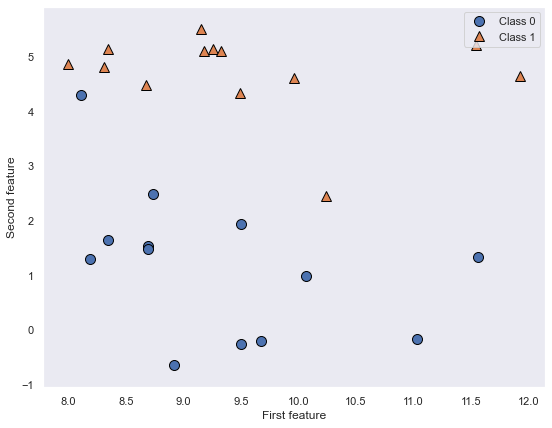

In [2]:
import mglearn
# generate dataset 
X, y = mglearn.datasets.make_forge()
plt.figure(figsize=(9,7))
sns.set(style='dark')
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=1)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))


Text(0, 0.5, 'Target')

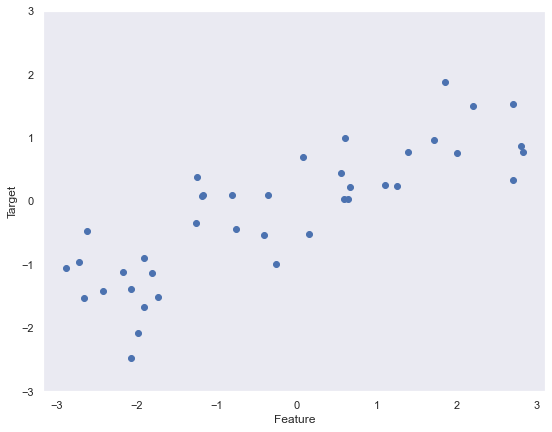

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.figure(figsize=(9,7))
sns.set(style='dark')
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")


    | Breast Cancer dataset

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
# The dataset consists of 569 data points, with 30 features each:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [6]:
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))


Sample counts per class:
{'malignant': 212, 'benign': 357}


In [7]:
print("Feature names:\n{}".format(cancer.feature_names))


Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


    | Boston Housing dataset

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))


X.shape: (506, 104)


    | k-Nearest Neighbors

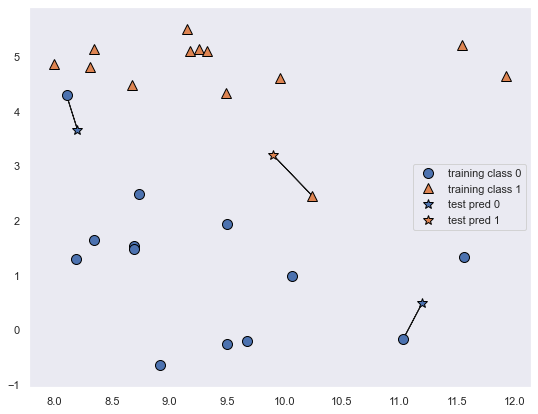

In [11]:
plt.figure(figsize=(9,7))
sns.set(style='dark')
mglearn.plots.plot_knn_classification(n_neighbors=1)

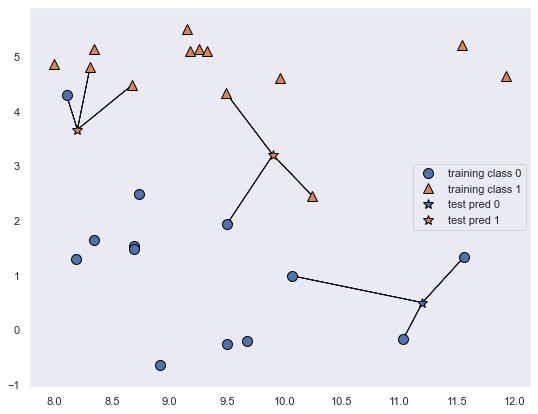

In [12]:
plt.figure(figsize=(9,7))
sns.set(style='dark')
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [13]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [16]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


    | Analyzing KNeighborsClassifier

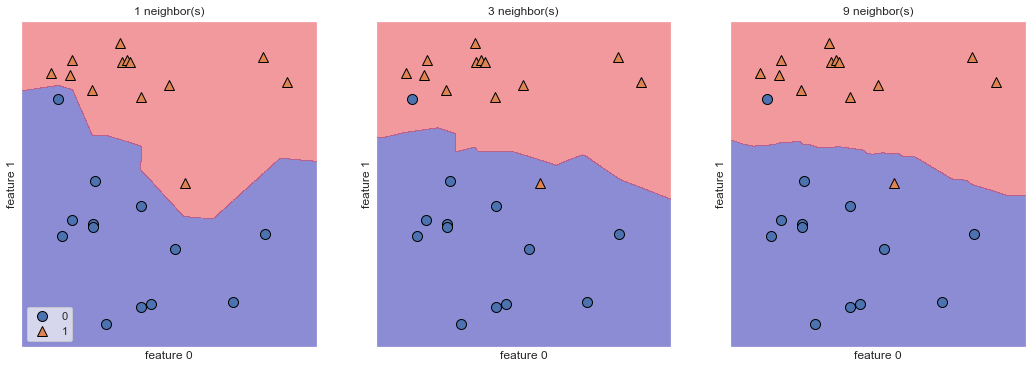

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for n_neighbors, ax in zip([1, 3, 9], axes):

    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    axes[0].legend(loc=3)

Figure 2-7. Comparison of training and test accuracy as a function of n_neighbors (page 54)

In [18]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=66)


In [19]:
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [20]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
 # build the model
 clf = KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X_train, y_train)
 # record training set accuracy
 training_accuracy.append(clf.score(X_train, y_train))
 # record generalization accuracy
 test_accuracy.append(clf.score(X_test, y_test))

In [21]:
training_accuracy

[1.0,
 0.9765258215962441,
 0.9577464788732394,
 0.9553990610328639,
 0.9483568075117371,
 0.9460093896713615,
 0.9436619718309859,
 0.9413145539906104,
 0.9342723004694836,
 0.9389671361502347]

In [22]:
test_accuracy

[0.9020979020979021,
 0.8881118881118881,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9370629370629371,
 0.9300699300699301,
 0.9300699300699301,
 0.916083916083916,
 0.916083916083916]

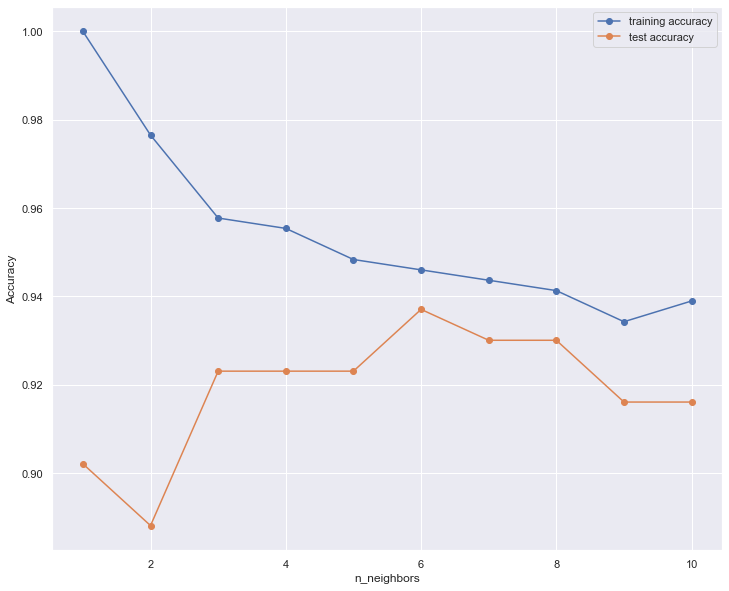

In [23]:
plt.figure(figsize=(12,10))
sns.set(style='dark')
plt.plot(neighbors_settings, training_accuracy,marker='o', label="training accuracy")
plt.plot(neighbors_settings, test_accuracy,marker='o', label="test accuracy")
plt.grid()
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

    | k-neighbors regression

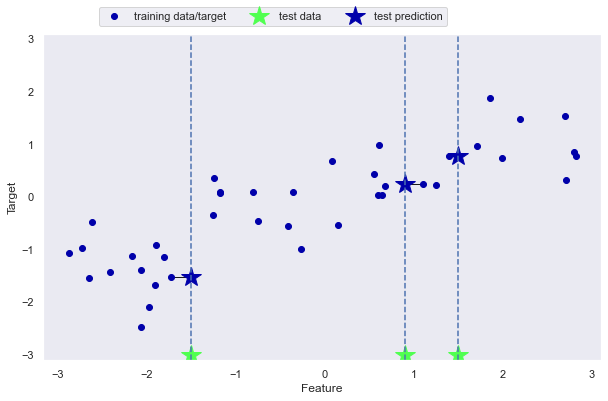

In [24]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

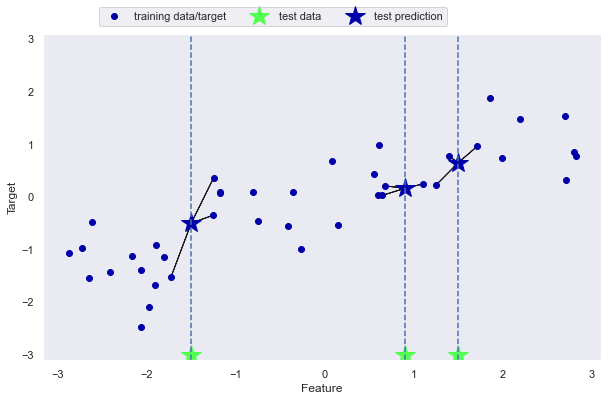

In [25]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [26]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [27]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [28]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


Avalue of 1 corresponds to a perfect prediction, and a value of 0 corresponds
to a constant model that just predicts the mean of the training set responses, y_train:

    | Analyzing KNeighborsRegressor

Figure 2-10. Comparing predictions made by nearest neighbors regression for different
values of n_neighbors (page 58)

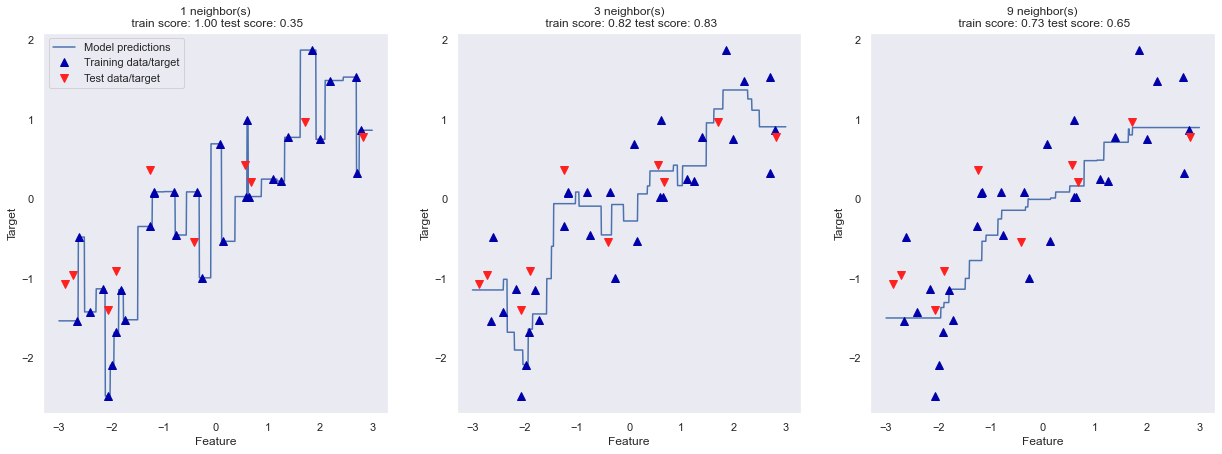

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(21, 7))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
 # make predictions using 1, 3, or 9 neighbors
 reg = KNeighborsRegressor(n_neighbors=n_neighbors)
 reg.fit(X_train, y_train)

 ax.plot(line, reg.predict(line))
 ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
 ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
 
 ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train),reg.score(X_test, y_test)))
 ax.set_xlabel("Feature")
 ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")

# Linear Models 

Trying to learn the parameters w[0] and b on our one-dimensional wave dataset
might lead to the following line (see Figure 2-11):

w[0]: 0.393906  b: -0.031804


<Figure size 720x720 with 0 Axes>

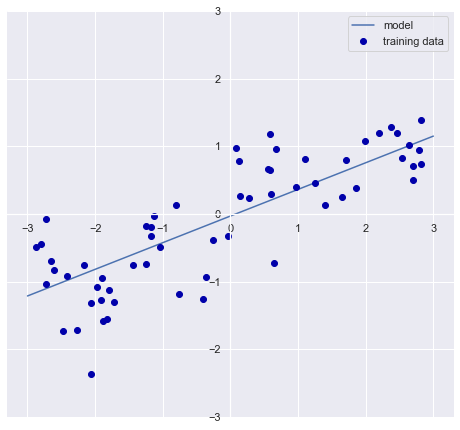

In [30]:
plt.figure(figsize=(10,10))
sns.set(style='dark')
mglearn.plots.plot_linear_regression_wave()

In [31]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [32]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


The “slope” parameters (w), also called weights or coefficients, are stored in the coef_ attribute, while the offset or intercept (b) is stored in the intercept_ attribute:

    | underfitting

In [33]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


    | overfitting

In [34]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [35]:
X_train.shape

(379, 104)

In [36]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score( R2 score): {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score( R2 score): 0.61


When comparing training set and test set scores, we find that we predict very accurately on the training set, but the R2 on the test set is much worse:

# Ridge regression 63

In [37]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [38]:
# increasing alpha
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [39]:
# Decreasing alpha
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))


Training set score: 0.93
Test set score: 0.77


In [40]:
ridge.coef_

array([-1.41368408e+00, -1.55661895e+00, -1.46543409e+00, -1.26616071e-01,
       -7.91193605e-02,  8.33161023e+00,  2.54975060e-01, -4.94145701e+00,
        3.89862268e+00, -1.05866058e+00, -1.58433734e+00,  1.05103856e+00,
       -4.01220799e+00,  3.33720475e-01,  3.64725471e-03, -8.49295793e-01,
        7.44989267e-01, -1.43106836e+00, -1.62981017e+00, -1.40486294e+00,
       -4.47314366e-02, -1.74619880e+00, -1.46715888e+00, -1.33237111e+00,
       -1.69154625e+00, -5.06179637e-01,  2.62197591e+00, -2.09210002e+00,
        1.95074661e-01, -2.75469422e-01,  5.11308202e+00, -1.67083739e+00,
       -9.81863179e-02,  6.34477127e-01, -6.10008281e-01,  4.01805897e-02,
       -1.27661999e+00, -2.91349679e+00,  3.39544035e+00,  7.91904036e-01,
        1.35260232e+00, -4.03661265e+00,  2.32361734e+00, -3.36712926e+00,
        1.81279204e+00,  3.01566897e+00, -1.89452070e+00, -2.50844073e-01,
       -2.89543735e+00, -1.26616071e-01, -5.00217192e+00, -2.43951806e+00,
        2.85071846e+00, -

In [41]:
ridge10.coef_

array([-8.11609631e-01,  6.47608896e-01, -8.09783229e-01,  3.11334709e-01,
       -6.84623747e-01,  4.38797575e+00, -1.47554474e-01, -2.44214065e+00,
        8.45915099e-01, -1.14727508e+00, -2.33162040e+00,  1.06787015e+00,
       -3.98391025e+00, -5.98636976e-01,  2.93228193e-03, -5.21253823e-01,
        1.40339673e-01, -6.45256057e-01, -7.61400539e-01, -7.47231171e-01,
       -3.86298005e-02, -8.29808059e-01, -7.52859756e-01, -6.75605899e-01,
       -8.72001488e-01, -3.23330640e-01,  1.27336327e+00, -3.37279550e-01,
        6.30682038e-02,  2.37092897e-01,  2.09805607e+00,  1.00996768e-01,
       -2.79529662e-01,  1.73222619e-01, -3.33557850e-01, -3.74226653e-01,
        6.98414808e-01, -6.96284918e-01,  7.79521010e-01,  3.74843210e-01,
       -6.24101244e-01, -7.63657605e-01,  4.35756439e-02, -1.04000852e+00,
        4.24401576e-01,  4.78687021e-01, -3.84125445e-01, -9.93802653e-02,
       -1.30226356e+00,  3.11334709e-01, -5.92097637e-01,  6.33816542e-01,
        6.66792895e-01, -

In [42]:
ridge01.coef_

array([-2.33300720e+00, -5.44192850e+00, -6.12865463e+00, -7.78524693e-01,
        1.29152995e+00,  1.90222839e+01,  4.35864731e+00, -1.11911067e+01,
        9.55539672e+00, -7.48671406e-01, -5.33307088e-01,  6.23384946e+00,
       -2.72886731e+00,  5.86117121e+00,  2.28233711e-02, -9.01608311e-01,
        4.66756441e+00, -3.37983354e+00,  1.31611460e+00, -3.48895554e+00,
        4.41536215e-01, -3.51941085e+00, -2.52222659e+00, -2.69562070e+00,
        2.44649480e-01, -1.02306604e+00,  3.04223584e+00, -2.68804128e+00,
        4.28396019e+00, -2.94109311e+00,  8.70934702e+00, -3.13683472e+00,
       -2.91608183e-01,  2.17487375e+00,  3.62658111e+00,  2.30047840e+00,
       -2.83789461e+00, -6.17207969e+00,  7.94858912e+00,  1.65631996e+00,
        8.72779643e+00,  1.08042552e+00,  5.72208008e+00, -4.76401068e+00,
        5.07461001e+00,  8.01603635e+00, -8.44254041e+00, -6.44526450e-01,
       -1.42288399e+01, -7.78524693e-01, -1.38982595e+01, -1.59298479e+01,
        6.42600904e+00, -

In [43]:
lr.coef_

array([-4.12710947e+02, -5.22432068e+01, -1.31898815e+02, -1.20041365e+01,
       -1.55107129e+01,  2.87163342e+01,  5.47040992e+01, -4.95346659e+01,
        2.65823927e+01,  3.70620316e+01, -1.18281674e+01, -1.80581965e+01,
       -1.95246830e+01,  1.22025403e+01,  2.98078144e+03,  1.50084257e+03,
        1.14187325e+02, -1.69700520e+01,  4.09613691e+01, -2.42636646e+01,
        5.76157466e+01,  1.27812142e+03, -2.23986944e+03,  2.22825472e+02,
       -2.18201083e+00,  4.29960320e+01, -1.33981515e+01, -1.93893485e+01,
       -2.57541277e+00, -8.10130128e+01,  9.66019367e+00,  4.91423718e+00,
       -8.12114800e-01, -7.64694179e+00,  3.37837099e+01, -1.14464390e+01,
        6.85083979e+01, -1.73753604e+01,  4.28128204e+01,  1.13988209e+00,
       -7.72696840e-01,  5.68255921e+01,  1.42875996e+01,  5.39551110e+01,
       -3.21709644e+01,  1.92709675e+01, -1.38852338e+01,  6.06343266e+01,
       -1.23153942e+01, -1.20041365e+01, -1.77243899e+01, -3.39868183e+01,
        7.08999816e+00, -

Figure 2-12. Comparing coefficient magnitudes for ridge regression with different values of alpha and linear regression

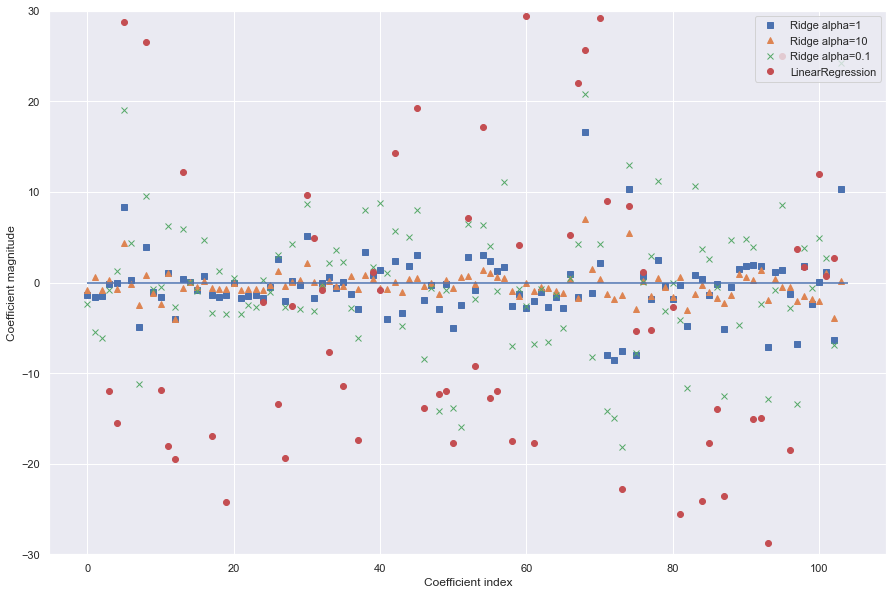

In [44]:
plt.figure(figsize=(15,10))
sns.set(style='dark')

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_,'^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'x', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-30, 30)
plt.grid()
plt.legend(loc=1)

Figure 2-13. Learning curves for ridge regression and linear regression on the Boston
Housing dataset

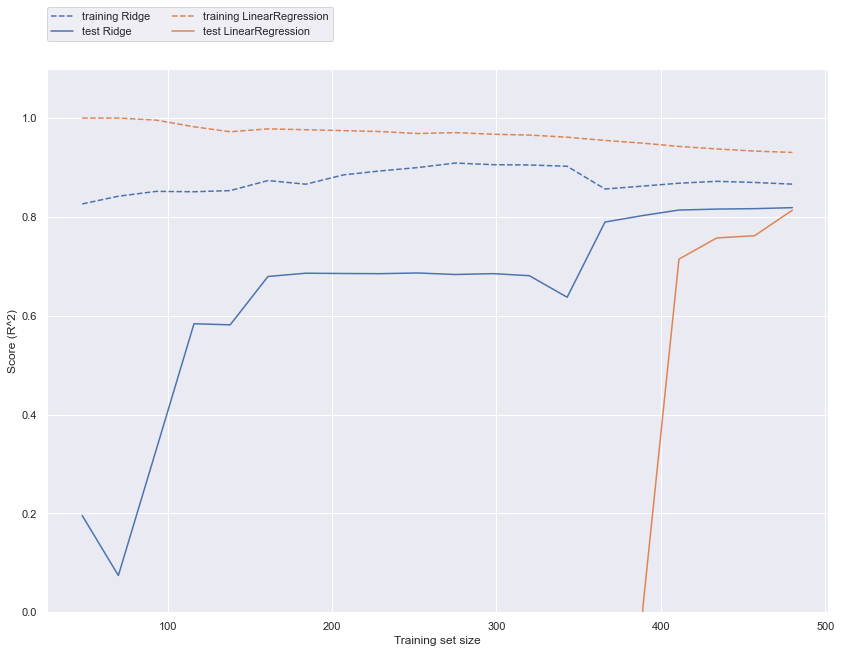

In [45]:

plt.figure(figsize=(14,10))
sns.set(style='dark')
mglearn.plots.plot_ridge_n_samples()
plt.grid()

# Lasso 67

In [46]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))


Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [47]:
lasso.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -5.3529079 , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.  

In [48]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [49]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))


Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Figure 2-14. Comparing coefficient magnitudes for lasso regression with different values of alpha and ridge regression

Text(0, 0.5, 'Coefficient magnitude')

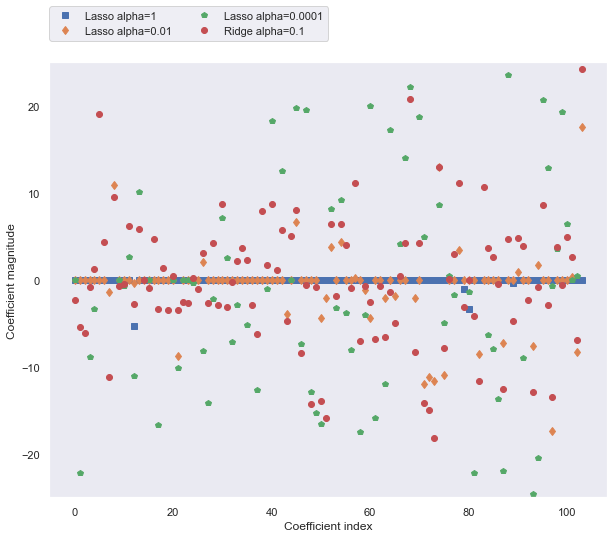

In [50]:
plt.figure(figsize=(10,8))
sns.set(style='dark')

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, 'd', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'p', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")


# ElasticNet 

In [51]:
from sklearn.linear_model import ElasticNet
ENreg = ElasticNet( ).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ENreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ENreg.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ENreg.coef_ != 0)))


Training set score: 0.33
Test set score: 0.22
Number of features used: 38


In [52]:
ENreg.coef_

array([-0.        ,  0.07847328, -0.39544504,  0.        , -0.03773639,
        0.36147212, -0.12250665,  0.        , -0.21072681, -0.50505697,
       -0.60918798,  0.        , -0.92162055, -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.06705207,  0.        , -0.041806  ,  0.        ,
       -0.        , -0.        , -0.38954754, -0.        , -0.        ,
       -0.15106842, -0.30397193, -0.        , -0.24961282,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.11707957, -0.        , -0.        , -0.10108367,
       -0.15478866, -0.        , -0.12123449,  0.66253056,  0.  

In [53]:
ENreg.intercept_

25.56907497964181

In [54]:
ENreg.n_iter_

16

In [55]:
from sklearn.linear_model import ElasticNet
ENreg001 = ElasticNet(alpha=0.01,max_iter=100000, random_state=0 ).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ENreg001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ENreg001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ENreg001.coef_ != 0)))

Training set score: 0.86
Test set score: 0.72
Number of features used: 84


In [56]:
from sklearn.linear_model import ElasticNet
ENreg00001 = ElasticNet(alpha=0.0001,max_iter=100000, random_state=0 ).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ENreg00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ENreg00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ENreg00001.coef_ != 0)))

Training set score: 0.94
Test set score: 0.73
Number of features used: 101


Text(0, 0.5, 'Coefficient magnitude')

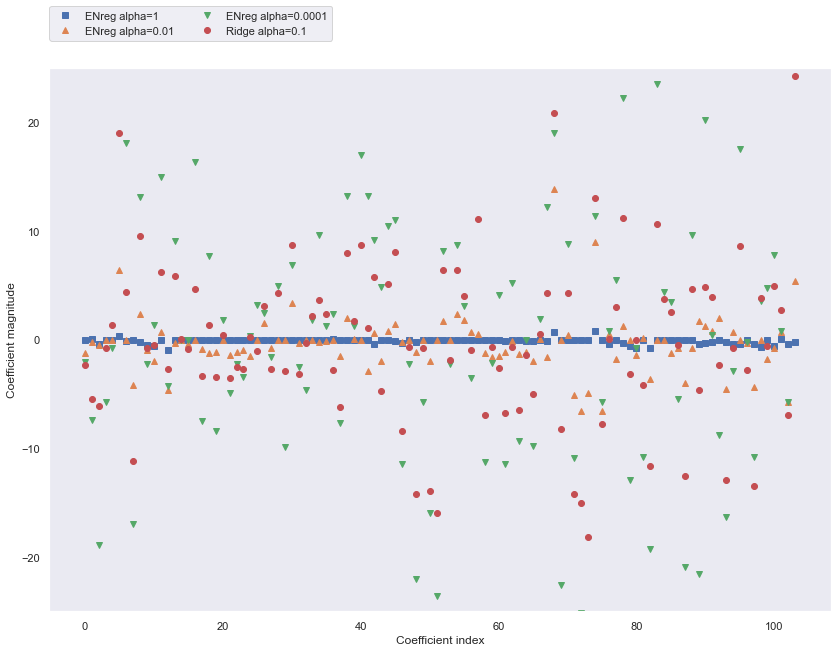

In [57]:
plt.figure(figsize=(14,10))
sns.set(style='dark')

plt.plot(ENreg.coef_, 's', label="ENreg alpha=1")
plt.plot(ENreg001.coef_, '^', label="ENreg alpha=0.01")
plt.plot(ENreg00001.coef_, 'v', label="ENreg alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

# Linear models for classification

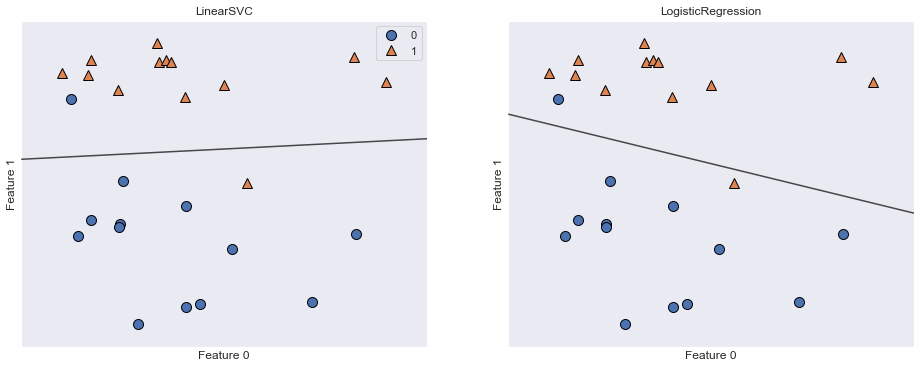

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
 clf = model.fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
 ax=ax, alpha=.7)
 mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("{}".format(clf.__class__.__name__))
 ax.set_xlabel("Feature 0")
 ax.set_ylabel("Feature 1")
axes[0].legend()

Figure 2-15. Decision boundaries of a linear SVM and logistic regression on the forge
dataset with the default parameters

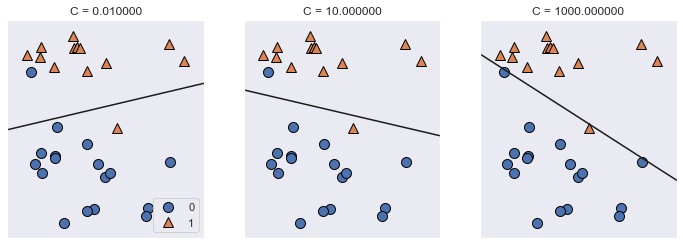

In [59]:
mglearn.plots.plot_linear_svc_regularization()

Figure 2-16. Decision boundaries of a linear SVM on the forge dataset for different
values of C

In [60]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


Training set score: 0.955
Test set score: 0.944


In [61]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))


Training set score: 0.958
Test set score: 0.958


We can also investigate what happens if we use an even more regularized model than
the default of C=1, by setting C=0.01

In [62]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


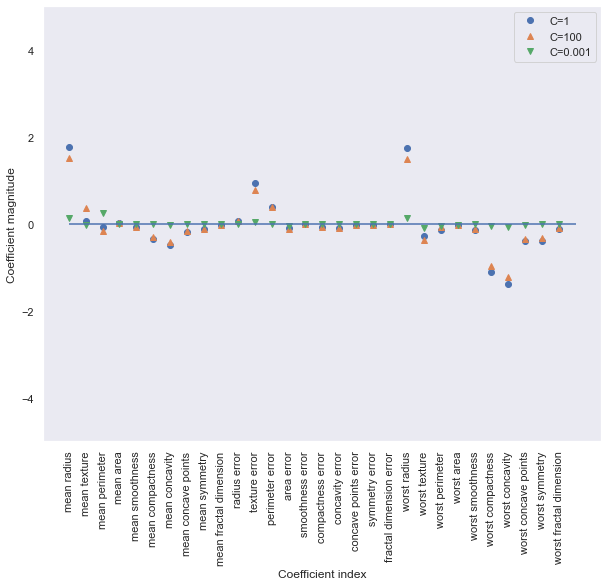

In [63]:
plt.figure(figsize=(10,8))
sns.set(style='dark')

plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()


Figure 2-17. Coefficients learned by logistic regression on the Breast Cancer dataset for
different values of C

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


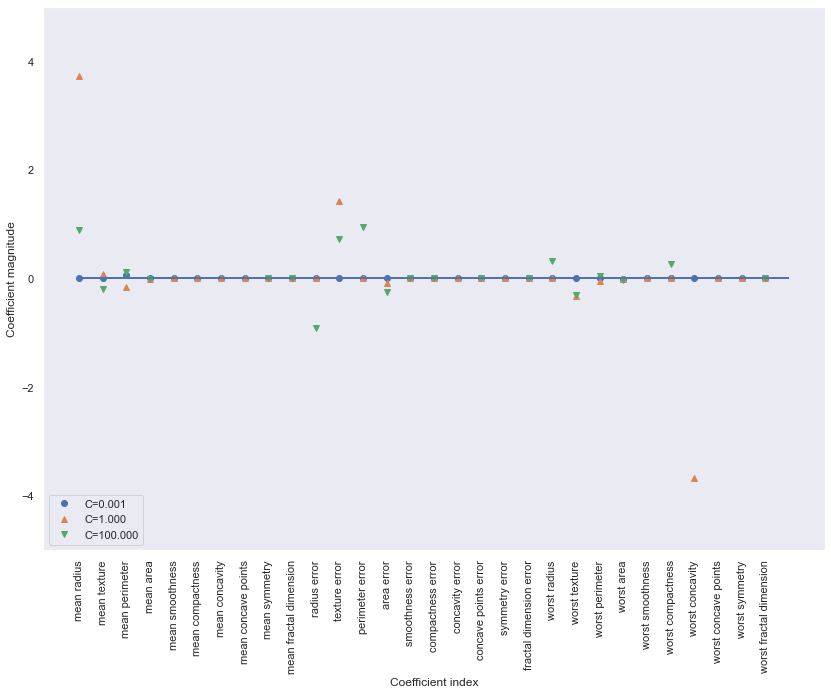

In [64]:
#  using L1 regularization
plt.figure(figsize=(14,10))
sns.set(style='dark')

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty = 'l1', solver='liblinear' ).fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
    plt.hlines(0, 0, cancer.data.shape[1])
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    plt.ylim(-5, 5)
    plt.legend(loc=3)


Figure 2-18. Coefficients learned by logistic regression with L1 penalty on the Breast
Cancer dataset for different values of C

# Linear models for multiclass classification

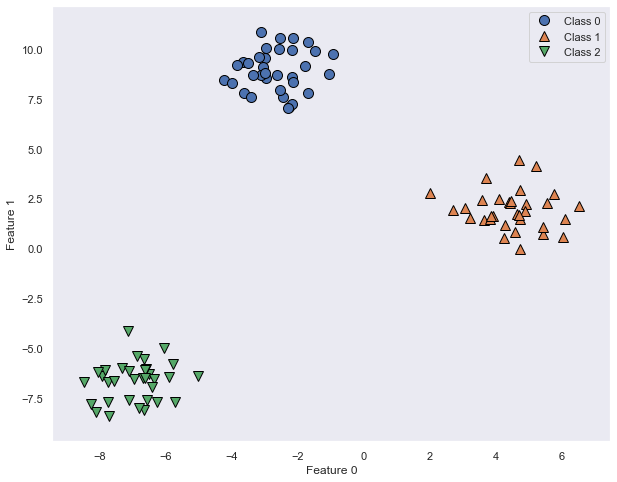

In [65]:
plt.figure(figsize=(10,8))
sns.set(style='dark')

from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

Figure 2-19. Two-dimensional toy dataset containing three classes

In [66]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)


Coefficient shape:  (3, 2)
Intercept shape:  (3,)


In [67]:
linear_svm.coef_.T

array([[-0.17492927,  0.47621167, -0.18914147],
       [ 0.23140913, -0.06936732, -0.20400567]])

In [68]:
linear_svm.intercept_

array([-1.07745352,  0.13140551, -0.0860499 ])

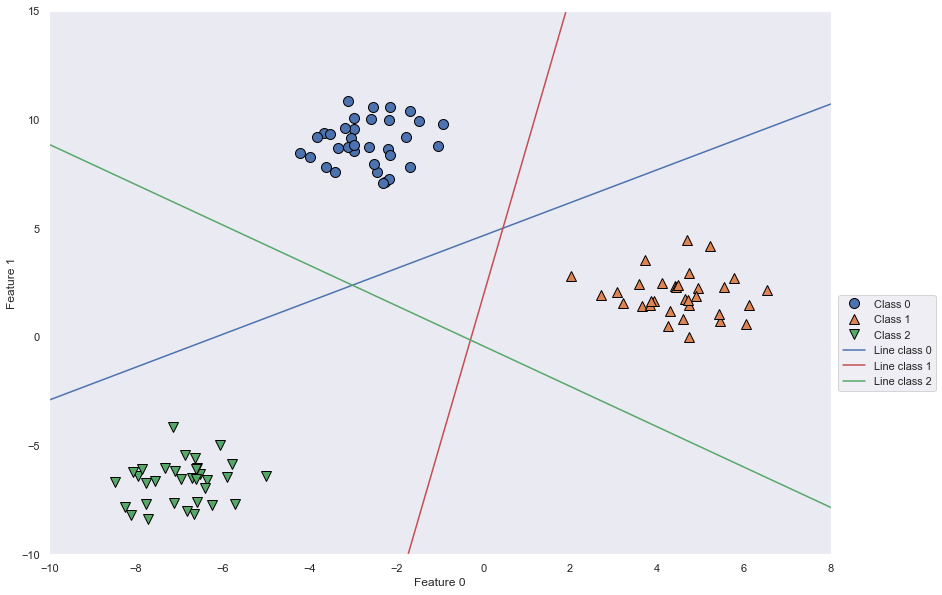

In [69]:
plt.figure(figsize=(14,10))
sns.set(style='dark')

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    plt.ylim(-10, 15)
    plt.xlim(-10, 8)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1','Line class 2'], loc=(1.01, 0.3))


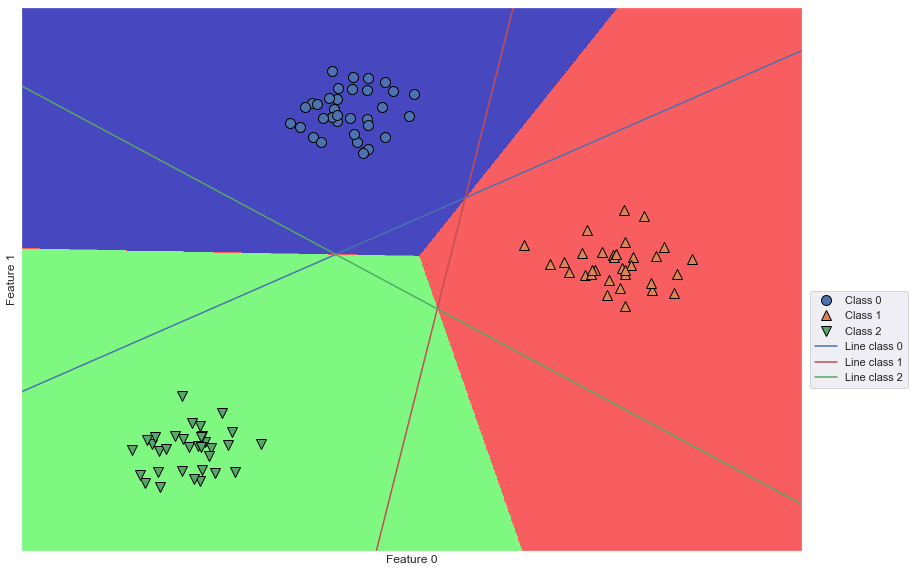

In [70]:
plt.figure(figsize=(14,10))
sns.set(style='dark')

mglearn.plots.plot_2d_classification(linear_svm, X, fill=True,alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1','Line class 2'], loc=(1.01, 0.3))
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")


# Naive Bayes Classifiers

In [71]:

X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])

y = np.array([0, 1, 0, 1])


In [72]:
counts = {}
for label in np.unique(y):
 # iterate over each class
 # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [73]:
for label in np.unique(y):
    print(label)

0
1


In [74]:
np.unique(y)

array([0, 1])

# Decision Trees

In [75]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [76]:
tree = DecisionTreeClassifier( min_samples_leaf=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.977
Accuracy on test set: 0.937


In [77]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],feature_names=cancer.feature_names, impurity=False, filled=True)

In [78]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
    graphviz.Source(dot_graph)

[Text(0.5833333333333334, 0.9285714285714286, 'worst radius <= 16.795\nsamples = 426\nvalue = [159, 267]\nclass = benign'),
 Text(0.36666666666666664, 0.7857142857142857, 'worst concave points <= 0.136\nsamples = 284\nvalue = [25, 259]\nclass = benign'),
 Text(0.2, 0.6428571428571429, 'radius error <= 0.626\nsamples = 252\nvalue = [4, 248]\nclass = benign'),
 Text(0.13333333333333333, 0.5, 'smoothness error <= 0.003\nsamples = 247\nvalue = [2, 245]\nclass = benign'),
 Text(0.06666666666666667, 0.35714285714285715, 'samples = 4\nvalue = [1, 3]\nclass = benign'),
 Text(0.2, 0.35714285714285715, 'worst texture <= 33.35\nsamples = 243\nvalue = [1, 242]\nclass = benign'),
 Text(0.13333333333333333, 0.21428571428571427, 'samples = 225\nvalue = [0, 225]\nclass = benign'),
 Text(0.26666666666666666, 0.21428571428571427, 'worst fractal dimension <= 0.079\nsamples = 18\nvalue = [1, 17]\nclass = benign'),
 Text(0.2, 0.07142857142857142, 'samples = 14\nvalue = [0, 14]\nclass = benign'),
 Text(0.33

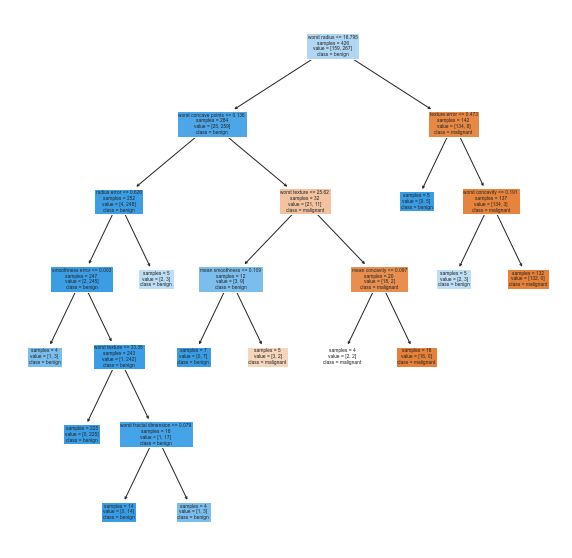

In [79]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(tree, class_names=["malignant", "benign"],feature_names=cancer.feature_names, impurity=False, filled=True)

In [80]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.01122335 0.
 0.00855113 0.         0.         0.         0.00804557 0.04932919
 0.         0.         0.00254311 0.         0.         0.
 0.         0.         0.74080904 0.03442032 0.         0.
 0.         0.         0.01853784 0.12446204 0.         0.0020784 ]


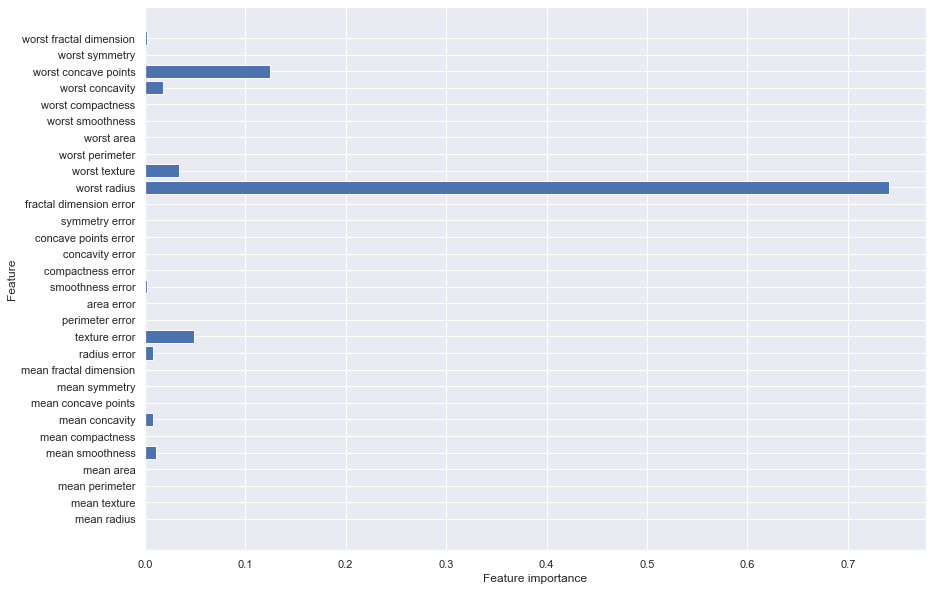

In [81]:

def plot_feature_importances_cancer(model):
    plt.figure(figsize=(14,10))
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.grid()
plot_feature_importances_cancer(tree)

In [82]:
import pandas as pd
ram_prices = pd.read_csv("Data/ram_price.csv")
ram_prices.head(5)

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


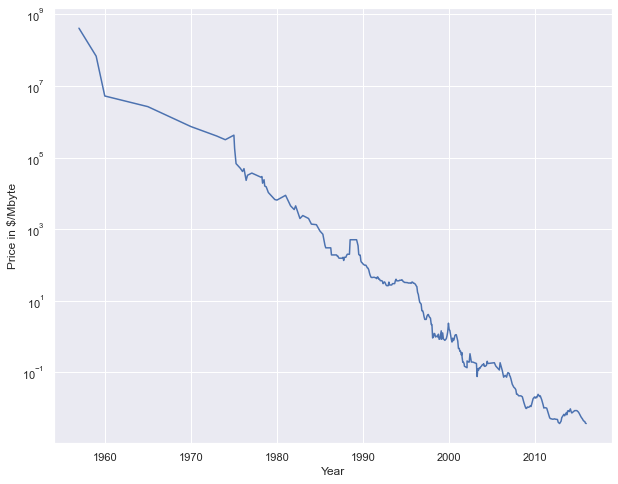

In [83]:
plt.figure(figsize=(10,8))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")
plt.grid()

In [84]:

from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]


In [85]:

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)


In [86]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

In [87]:
# predict on all data
X_all = ram_prices.date[:, np.newaxis]
X_all.shape

(333, 1)

In [88]:
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

In [89]:
# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)


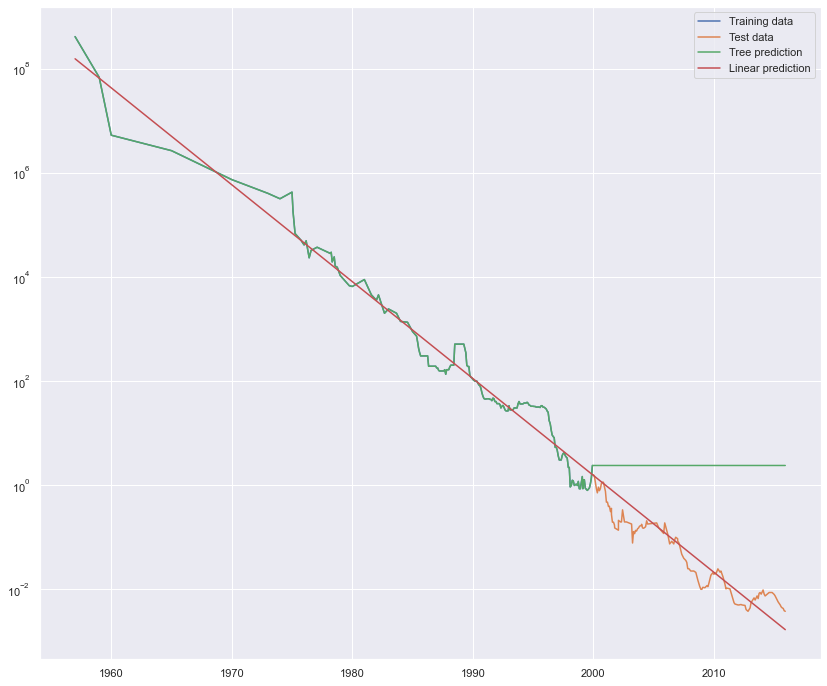

In [90]:
plt.figure(figsize=(14,12))

plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.grid()
plt.legend()


# Random forests

In [91]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)


RandomForestClassifier(n_estimators=5, random_state=2)

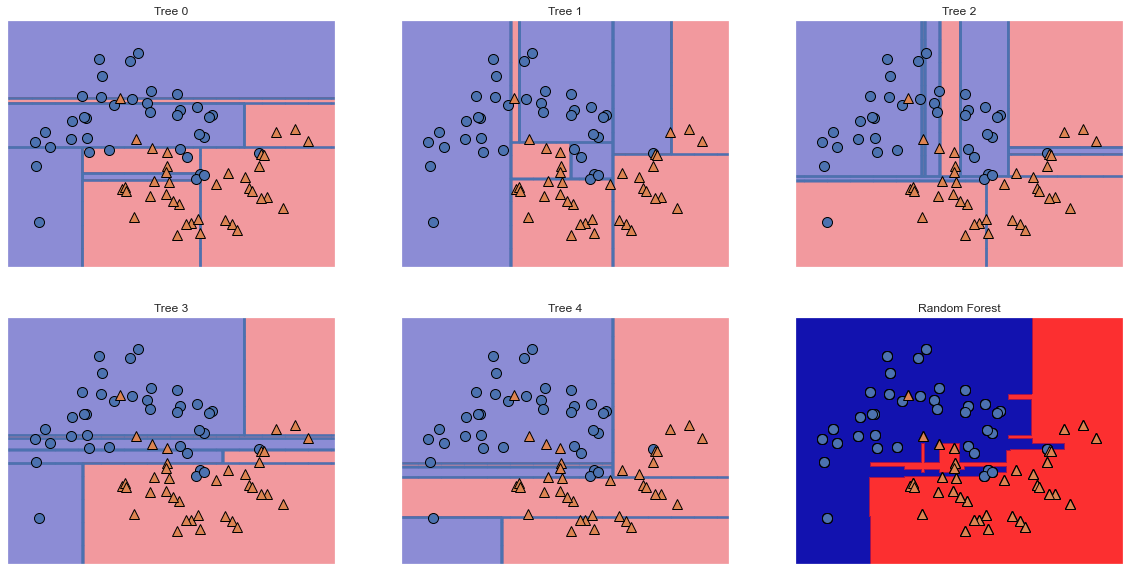

In [92]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],alpha=.4)
    axes[-1, -1].set_title("Random Forest")
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)


In [93]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [94]:
print("Feature importances:\n{}".format(forest.feature_importances_))

Feature importances:
[0.02515433 0.01563844 0.05372655 0.04861645 0.00769078 0.00936994
 0.05539489 0.10305394 0.0065771  0.00282708 0.02921459 0.00607814
 0.01342868 0.03420174 0.00360641 0.00432096 0.00448775 0.00657502
 0.00460597 0.00627095 0.11657269 0.01603133 0.16027724 0.0634688
 0.01356448 0.01164113 0.03923725 0.11711756 0.01164259 0.00960721]


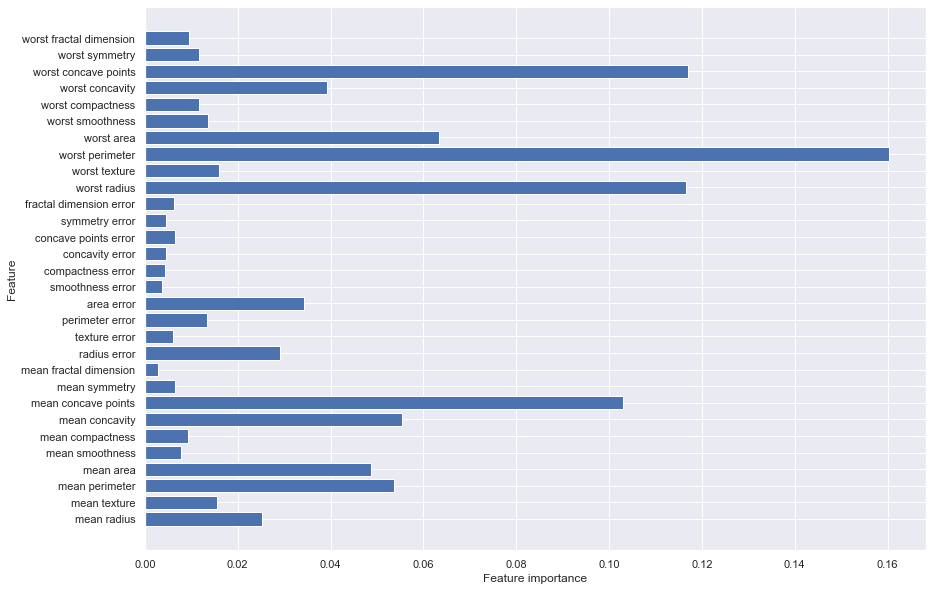

In [95]:
plot_feature_importances_cancer(forest)


# Gradient boosted regression trees

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [97]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [98]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.958


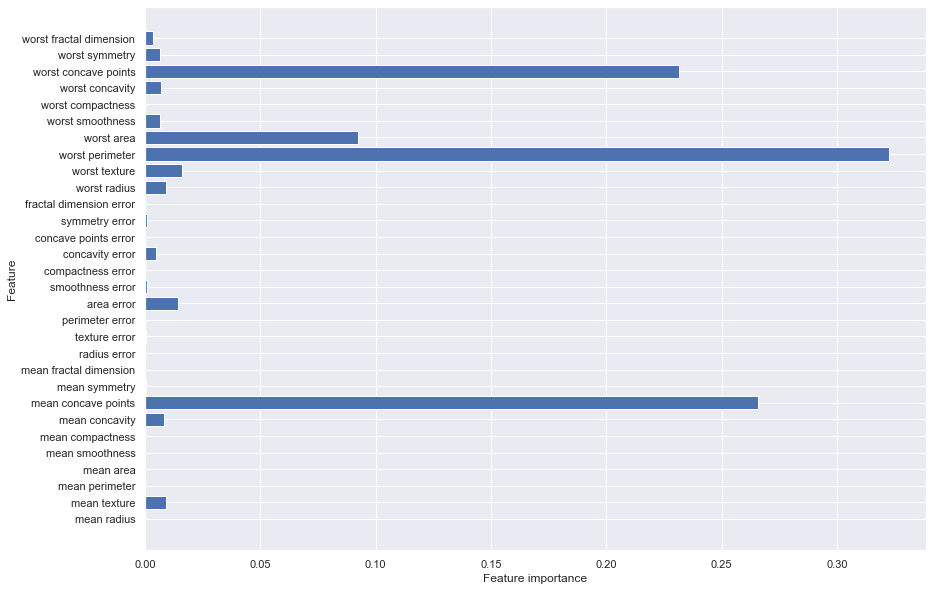

In [99]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

# Kernelized Support Vector Machines

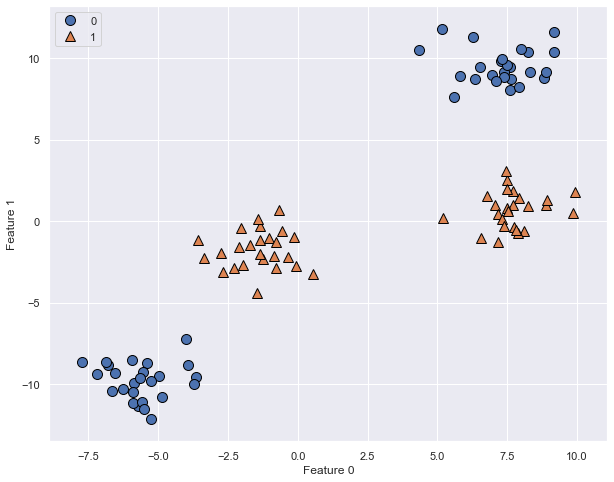

In [100]:
plt.figure(figsize=(10,8))
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.grid()
plt.legend(loc=2)


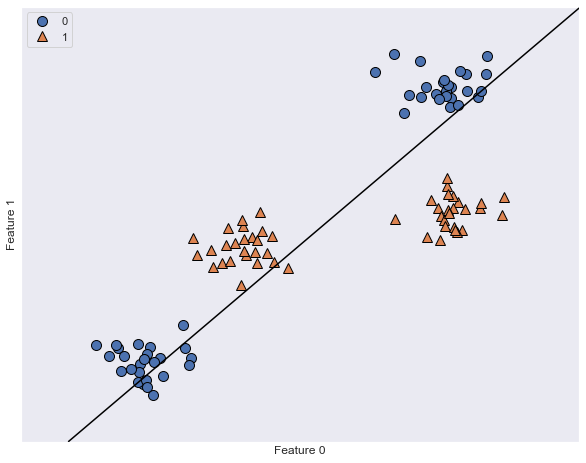

In [101]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
plt.figure(figsize=(10,8))
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.grid()
plt.legend(loc=2)


In [102]:
X

array([[ -1.72161036,  -1.48033142],
       [ -3.6573384 ,  -9.5482383 ],
       [  7.0778163 ,   0.99508772],
       [ -1.36579859,  -0.3148625 ],
       [ -2.66521206,  -3.12591651],
       [  7.63027116,   8.69797933],
       [ -5.27144331, -12.11880698],
       [  7.91767139,   1.41547387],
       [ -1.41284184,   0.11296348],
       [ -1.01519039,  -1.03318203],
       [  8.2634157 ,  10.34723435],
       [  6.96767867,   8.9622523 ],
       [ -0.84779249,  -2.12185612],
       [  7.48006237,   2.49392925],
       [  7.71454967,   1.8420701 ],
       [ -7.74064658,  -8.61800744],
       [ -5.41087235,  -8.7194128 ],
       [ -2.27579204,  -2.89699926],
       [ -1.25668449,  -2.33416219],
       [  7.61227907,   9.4463627 ],
       [  8.81545663,   8.76386046],
       [  7.1895354 ,   0.43090048],
       [  7.40292703,   9.16217702],
       [  5.17209648,  11.78064756],
       [ -2.10476115,  -1.57846672],
       [  6.5342397 ,   9.45532341],
       [  7.59635095,   8.0197955 ],
 

In [103]:
X[:, 1:]

array([[ -1.48033142],
       [ -9.5482383 ],
       [  0.99508772],
       [ -0.3148625 ],
       [ -3.12591651],
       [  8.69797933],
       [-12.11880698],
       [  1.41547387],
       [  0.11296348],
       [ -1.03318203],
       [ 10.34723435],
       [  8.9622523 ],
       [ -2.12185612],
       [  2.49392925],
       [  1.8420701 ],
       [ -8.61800744],
       [ -8.7194128 ],
       [ -2.89699926],
       [ -2.33416219],
       [  9.4463627 ],
       [  8.76386046],
       [  0.43090048],
       [  9.16217702],
       [ 11.78064756],
       [ -1.57846672],
       [  9.45532341],
       [  8.0197955 ],
       [  0.68997013],
       [-10.77386053],
       [  0.97764968],
       [ -0.58369965],
       [ -2.88641638],
       [  1.76719511],
       [ -2.02701586],
       [  7.59170022],
       [ -9.51656559],
       [ -0.60647802],
       [ 11.28717687],
       [  3.10336163],
       [ -9.27237881],
       [  0.99191322],
       [ -2.2023075 ],
       [ -9.99476306],
       [-11

Text(0.5, 0, 'feature1 ** 2')

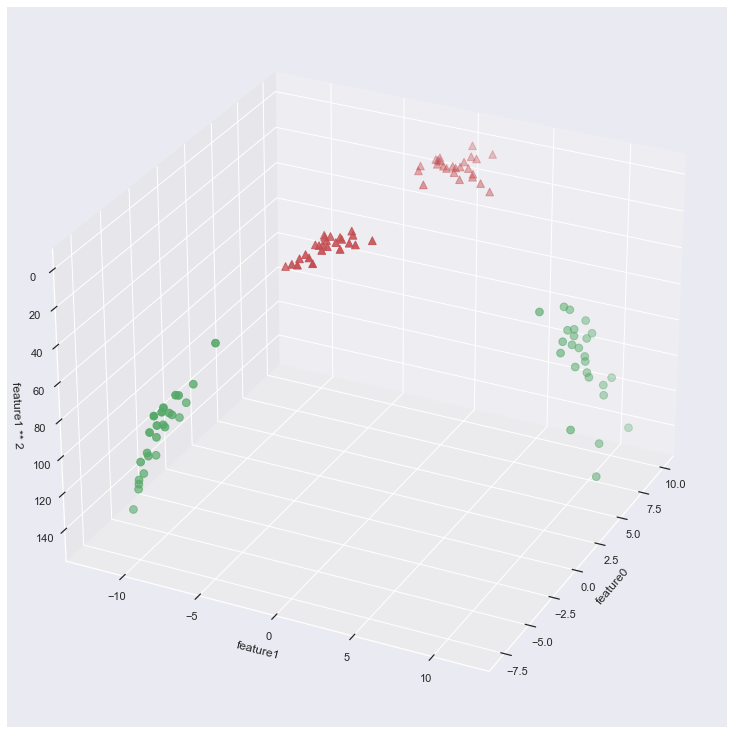

In [104]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure(figsize=(12,10))

# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y == 0, then all with y == 1
mask = y == 0

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='g',cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0.5, 0, 'feature0 ** 2')

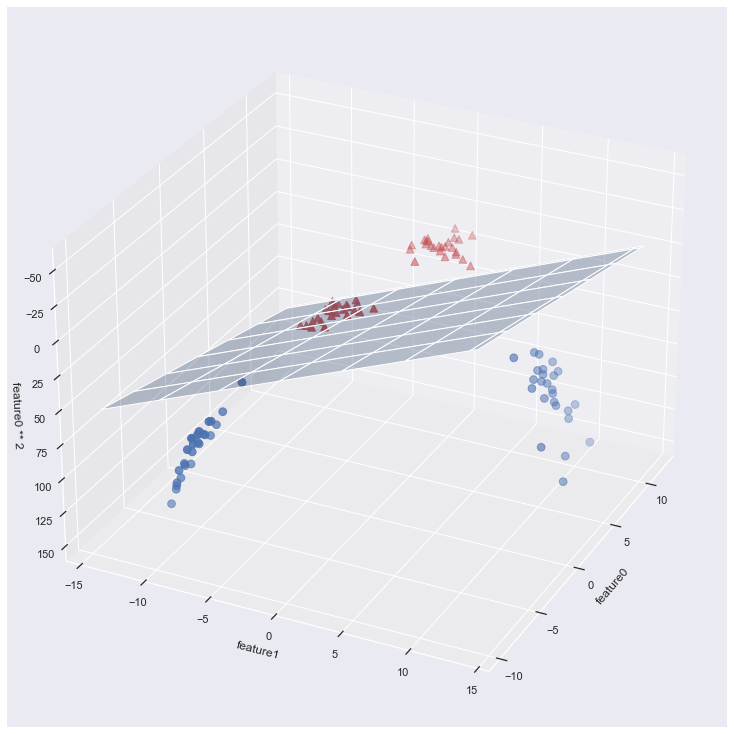

In [105]:

linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# show linear decision boundary
figure = plt.figure(figsize=(12,10))
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")

Text(0, 0.5, 'Feature 1')

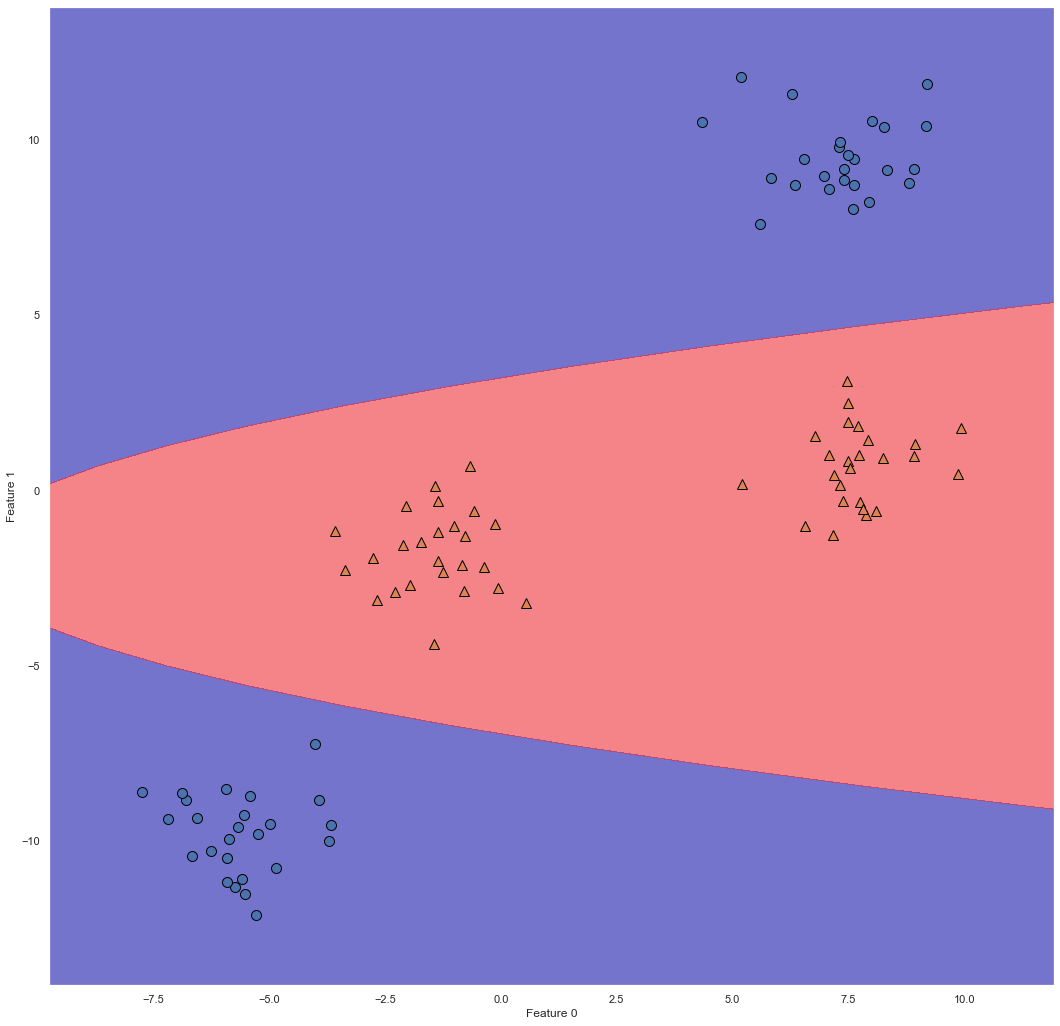

In [106]:
plt.figure(figsize=(18,18))
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
 cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


Gamma is used when we use the Gaussian RBF kernel. if you use linear or polynomial kernel then you do not need gamma only you need C hypermeter.

Text(0, 0.5, 'Feature 1')

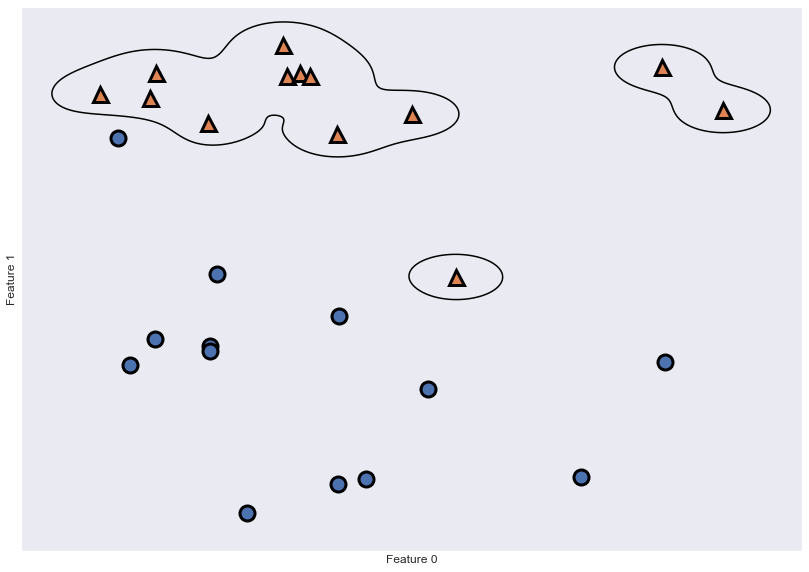

In [107]:
from sklearn.svm import SVC

plt.figure(figsize=(14,10))
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=0.1, gamma=10).fit(X, y)

mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


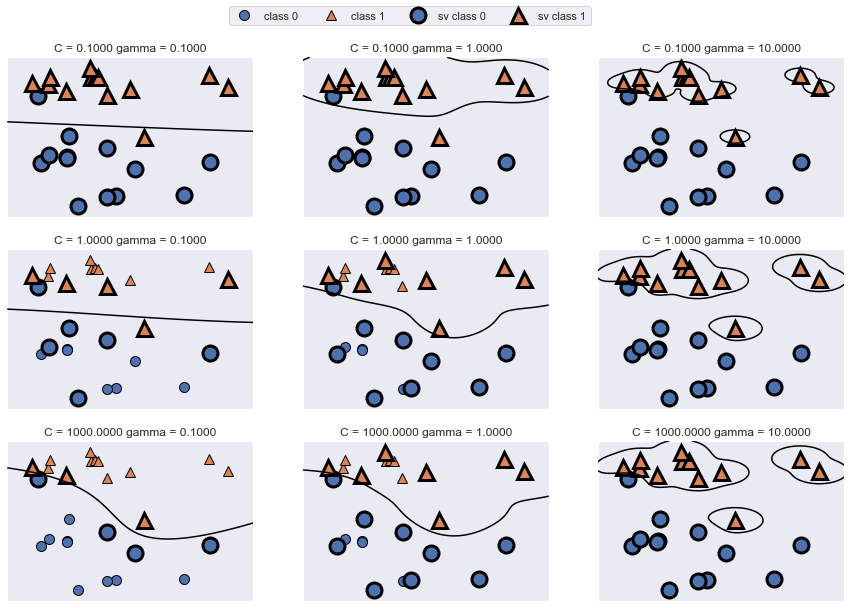

In [108]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],ncol=4, loc=(.9, 1.2))


In [109]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


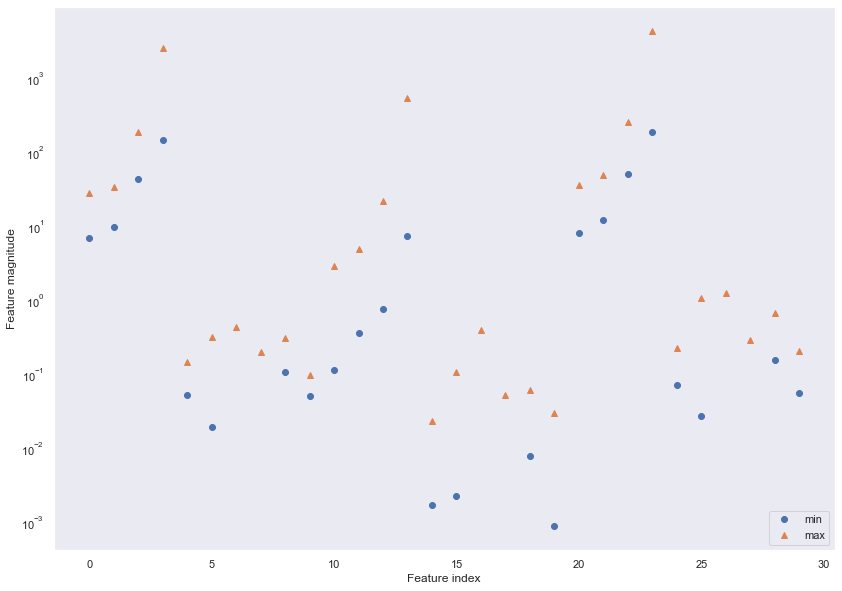

In [110]:
plt.figure(figsize=(14,10))

plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")


In [111]:

# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)
# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))


Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [112]:

# use THE SAME transformation on the test set,
# using min and range of the training set (see Chapter 3 for details)
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))


Accuracy on training set: 0.984
Accuracy on test set: 0.972


In [113]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.958


# Neural Networks (Deep Learning) 118

Text(0, 0.5, 'relu(x), tanh(x)')

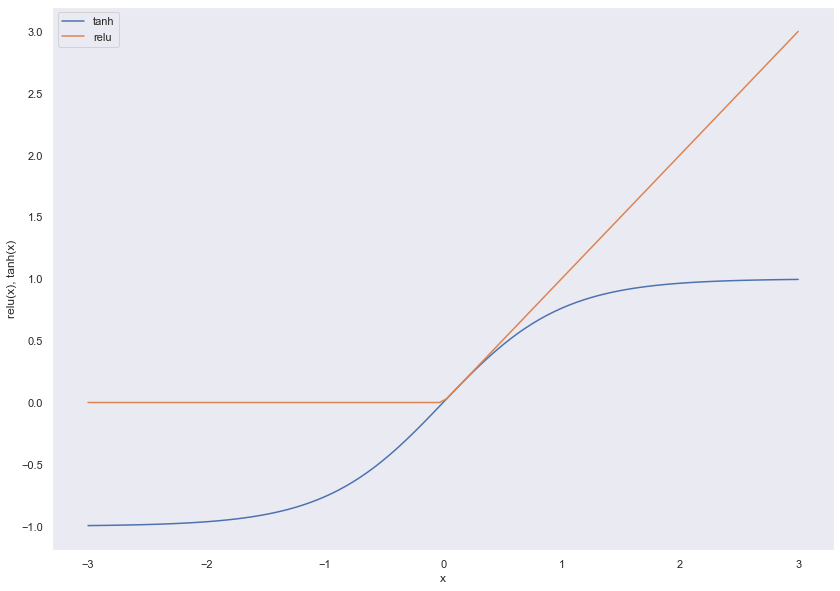

In [114]:
plt.figure(figsize=(14,10))

line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

In [115]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [116]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))


Accuracy on training set: 0.94
Accuracy on test set: 0.92


In [117]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)
# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


In [118]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))


Accuracy on training set: 0.988
Accuracy on test set: 0.972


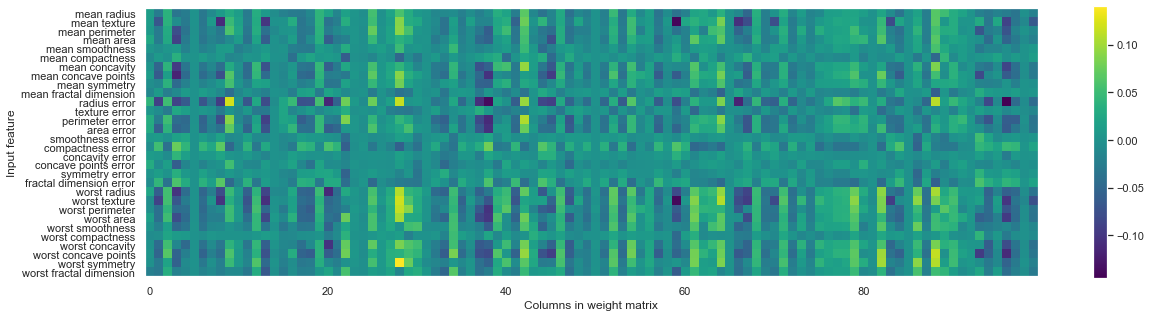

In [119]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

# The Decision Function

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles

In [169]:
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
# we rename the classes "blue" and "red" for illustration purposes
y_named = np.array(["blue", "red"])[y]

In [167]:
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

In [170]:
# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

In [171]:
print("X_test.shape: {}".format(X_test.shape))
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
Decision function shape: (25,)


In [175]:
y_test

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0], dtype=int64)

In [172]:
gbrt.decision_function(X_test)

array([ 4.13592603, -1.67785652, -3.95106099, -3.62604651,  4.28986642,
        3.66166081, -7.69097179,  4.11001686,  1.10753937,  3.40782222,
       -6.46260856,  4.28986642,  3.90156346, -1.20031247,  3.66166081,
       -4.17231157, -1.23010079, -3.91576223,  4.03602783,  4.11001686,
        4.11001686,  0.65709014,  2.69826265, -2.65673274, -1.86776596])

In [176]:
# show the first few entries of decision_function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6]))

Decision function:
[ 4.13592603 -1.67785652 -3.95106099 -3.62604651  4.28986642  3.66166081]


In [181]:
print("Thresholded decision function:\n{}".format(gbrt.decision_function(X_test) > 0))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]


In [182]:
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [187]:
# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
greater_zero

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0])

In [189]:
# use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]
pred

array(['red', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red',
       'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue',
       'red', 'red', 'red', 'red', 'red', 'blue', 'blue'], dtype='<U4')

In [190]:


# pred is the same as the output of gbrt.predict
print("pred is equal to predictions: {}".format(np.all(pred == gbrt.predict(X_test))))


pred is equal to predictions: True


In [191]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(np.min(decision_function), np.max(decision_function)))

Decision function minimum: -7.69 maximum: 4.29


# Predicting Probabilities

In [193]:
print("Shape of probabilities: {}".format(gbrt.predict_proba(X_test).shape))


Shape of probabilities: (25, 2)


In [196]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test[:6])))


Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84262049 0.15737951]
 [0.98112869 0.01887131]
 [0.97406909 0.02593091]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


# Uncertainty in Multiclass Classification

In [199]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [201]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [202]:
X_test

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3

In [200]:
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))
# plot the first few entries of the decision function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

Decision function shape: (38, 3)
Decision function:
[[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


In [203]:
print("Argmax of decision function:\n{}".format(np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [206]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test)[:6]))
# show that sums across rows are one
print("Sums: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

Predicted probabilities:
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
Sums: [1. 1. 1. 1. 1. 1.]


In [207]:
print("Argmax of predicted probabilities:\n{}".format(np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))


Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [209]:
logreg = LogisticRegression()
# represent each target by its class name in the iris dataset
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)

print("unique classes in training data: {} \n".format(logreg.classes_))

print("predictions: {}\n".format(logreg.predict(X_test)[:10]))

argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)

print("argmax of decision function: {}\n".format(argmax_dec_func[:10]))
print("argmax combined with classes_: {}".format( logreg.classes_[argmax_dec_func][:10]))


unique classes in training data: ['setosa' 'versicolor' 'virginica'] 

predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']

argmax of decision function: [1 0 2 1 1 0 1 2 1 1]

argmax combined with classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
